Marissa Bush 

February 25, 2023

# Business Problem

Head injuries and concussions have become a serious issue in professional sports, affecting the health of players and the winning potential of teams. The goal of this project is to predict which NHL players are more likely to suffer head injuries based on their past performance and other relevant information. This analysis is targeted towards NHL teams and team managers to help them take proactive measures to prevent head injuries and minimize the impact of such injuries on the team’s performance. My goal is to make a predictive model that can predict whether a player will get a head injury or not. 

### 1. Obtain

#### 1.1 Import Statements

Imports the packages including pandas, numpy, matplotlib, scipy, seaborn, scikit-learn, and imblearn. It also sets the random seed to ensure reproducibility. Also, imports a function named model_helper from a module, model_helper.py.

In [2]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import stats
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, classification_report

from imblearn.over_sampling import SMOTE

from model_helper import model_helper


np.random.seed(86)
random.seed(86)

Load in data that was collected from the `data_notebook.ipynb`

In [3]:
df = pd.read_csv("data/df.csv")
df.head()

,player,team,gp,g,a,tp,ppg,pim,+/-,link,season,league,playername,position,fw_def,Name,Games Missed,head_injuries
0,Jaromír Jágr (RW),Pittsburgh Penguins,81,52,69,121,1.49,42,19,https://www.eliteprospects.com/player/8627/jar...,2000-01,nhl,Jaromír Jágr,RW,FW,0,0.0,0
1,Joe Sakic (C),Colorado Avalanche,82,54,64,118,1.44,30,45,https://www.eliteprospects.com/player/8862/joe...,2000-01,nhl,Joe Sakic,C,FW,0,0.0,0
2,Patrik Elias (LW),New Jersey Devils,82,40,56,96,1.17,51,45,https://www.eliteprospects.com/player/8698/pat...,2000-01,nhl,Patrik Elias,LW,FW,0,0.0,0
3,Alexei Kovalev (RW),Pittsburgh Penguins,79,44,51,95,1.2,96,12,https://www.eliteprospects.com/player/8670/ale...,2000-01,nhl,Alexei Kovalev,RW,FW,0,0.0,0
4,Jason Allison (C),Boston Bruins,82,36,59,95,1.16,85,-8,https://www.eliteprospects.com/player/9064/jas...,2000-01,nhl,Jason Allison,C,FW,0,0.0,0


### 2. Scrub

#### 2.1 Data Cleaning

Look at the unique values in the `season` column.  This will tell me how many years are in the dataset.

In [4]:
# check unique values of "season" column
df["season"].unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18',
       '2018-19', '2019-20', '2020-21'], dtype=object)

We have data from the 2000/2001 season to the 2020/2021 season.  

Check to see if I have any null values in the data

In [5]:
# look for missing values
df.isnull().sum()

player           0
team             0
gp               0
g                0
a                0
tp               0
ppg              0
pim              0
+/-              0
link             0
season           0
league           0
playername       0
position         0
fw_def           0
Name             0
Games Missed     0
head_injuries    0
dtype: int64

I do not have any data that is null

Checking for duplicated rows in the df dataframe and assigns them to the variable duplicates

In [6]:
# check for duplicate values 
duplicates = df[df.duplicated()]
duplicates

,player,team,gp,g,a,tp,ppg,pim,+/-,link,season,league,playername,position,fw_def,Name,Games Missed,head_injuries
234,Serge Aubin (C/LW),Columbus Blue Jackets,81,13,17,30,0.37,107,-20,https://www.eliteprospects.com/player/8785/ser...,2000-01,nhl,Serge Aubin,C/LW,FW,Serge Aubin,2.0,1
1552,Brad Bombardir (D),Minnesota Wild,28,1,2,3,0.11,14,-6,https://www.eliteprospects.com/player/25131/br...,2001-02,nhl,Brad Bombardir,D,DEF,Brad Bombardir,1.0,1
5528,Matt Cullen (C),New York Rangers,80,16,25,41,0.51,52,0,https://www.eliteprospects.com/player/8754/mat...,2006-07,nhl,Matt Cullen,C,FW,Matt Cullen,7.0,1
7386,Brent Seabrook (D),Chicago Blackhawks,82,8,18,26,0.32,62,23,https://www.eliteprospects.com/player/8879/bre...,2008-09,nhl,Brent Seabrook,D,DEF,Brent Seabrook,2.0,1
7781,Derek Boogaard (LW),Minnesota Wild,51,0,3,3,0.06,87,3,https://www.eliteprospects.com/player/9084/der...,2008-09,nhl,Derek Boogaard,LW,FW,Derek Boogaard,5.0,1
10560,Patrick Eaves (RW/LW),Detroit Red Wings,10,0,1,1,0.1,2,0,https://www.eliteprospects.com/player/9144/pat...,2011-12,nhl,Patrick Eaves,RW/LW,FW,Patrick Eaves,1.0,1
14045,Pavel Zacha (C/LW),New Jersey Devils,1,0,2,2,2.0,0,4,https://www.eliteprospects.com/player/130786/p...,2015-16,nhl,Pavel Zacha,C/LW,FW,Pavel Zacha,4.0,1


In [7]:
# drop duplicates
df = df.drop_duplicates()

Renames the columns into a format that makes more sense for me 

In [8]:
# rename columns
df.rename(columns={'gp': 'games_played', 'g': 'goals', 'a': 'assists',
                   'tp': 'total_points', 'ppg': 'points_per_game', 'pim': 'penalty_minutes',
                  '+/-': 'team_goal_differential', 'playername': 'player_name', 'fw_def': 'forward_defense',
                  'Name': 'name', 'Games Missed': 'games_missed'}, inplace=True)


In [9]:
# view updated column names
df.columns

Index(['player', 'team', 'games_played', 'goals', 'assists', 'total_points',
       'points_per_game', 'penalty_minutes', 'team_goal_differential', 'link',
       'season', 'league', 'player_name', 'position', 'forward_defense',
       'name', 'games_missed', 'head_injuries'],
      dtype='object')

#### 2.2 Feature Engineering

In this section I am going to create a new feature - whether the player previously had a head injury or not.  I believe these will be a useful feature because if a player previously had a head injury, I think, that will make them more likely to get a head injury in the future.  

I am first going to make a new column called year, which will convert the season to an integer.  I will use this later for filtering by the year. 

In [10]:
# filter dataframe to only be the player and for the season to be before the season that I am checking
df['year'] = df['season'].map(lambda x: int(x.split('-')[0]))
df.head()

,player,team,games_played,goals,assists,total_points,points_per_game,penalty_minutes,team_goal_differential,link,season,league,player_name,position,forward_defense,name,games_missed,head_injuries,year
0,Jaromír Jágr (RW),Pittsburgh Penguins,81,52,69,121,1.49,42,19,https://www.eliteprospects.com/player/8627/jar...,2000-01,nhl,Jaromír Jágr,RW,FW,0,0.0,0,2000
1,Joe Sakic (C),Colorado Avalanche,82,54,64,118,1.44,30,45,https://www.eliteprospects.com/player/8862/joe...,2000-01,nhl,Joe Sakic,C,FW,0,0.0,0,2000
2,Patrik Elias (LW),New Jersey Devils,82,40,56,96,1.17,51,45,https://www.eliteprospects.com/player/8698/pat...,2000-01,nhl,Patrik Elias,LW,FW,0,0.0,0,2000
3,Alexei Kovalev (RW),Pittsburgh Penguins,79,44,51,95,1.2,96,12,https://www.eliteprospects.com/player/8670/ale...,2000-01,nhl,Alexei Kovalev,RW,FW,0,0.0,0,2000
4,Jason Allison (C),Boston Bruins,82,36,59,95,1.16,85,-8,https://www.eliteprospects.com/player/9064/jas...,2000-01,nhl,Jason Allison,C,FW,0,0.0,0,2000


This code iterates through the dataframe and checks whether the player previously got a concussion by filtering for the player and for the year prior to the year we are checking for.  

In [11]:
# feature engineer a new column that illustrates whether a player had a previous head injury
df['previous_head_injuries'] = 0
for index, row in df.iterrows():
    number_of_head_injuries = df[(df['player'] == row['player']) & 
                              (df['year'] < row['year'])]['head_injuries'].sum()
    df.loc[index, 'previous_head_injuries'] = number_of_head_injuries

#### 2.3 More Data Cleaning

Dropping columns that I will not be using during the modeling process.  These are columns that will not provide any value to a machine learning algorithm. 

In [12]:
# drop unnecessary columns
df.drop(columns=['player', 'link', 'name', 'season', 'forward_defense', 'games_missed', 'year'], 
        axis=1, inplace=True)

In [13]:
# view updated dataframe
df.head()

,team,games_played,goals,assists,total_points,points_per_game,penalty_minutes,team_goal_differential,league,player_name,position,head_injuries,previous_head_injuries
0,Pittsburgh Penguins,81,52,69,121,1.49,42,19,nhl,Jaromír Jágr,RW,0,0
1,Colorado Avalanche,82,54,64,118,1.44,30,45,nhl,Joe Sakic,C,0,0
2,New Jersey Devils,82,40,56,96,1.17,51,45,nhl,Patrik Elias,LW,0,0
3,Pittsburgh Penguins,79,44,51,95,1.2,96,12,nhl,Alexei Kovalev,RW,0,0
4,Boston Bruins,82,36,59,95,1.16,85,-8,nhl,Jason Allison,C,0,0


As a sanity check - making sure there is only one league in my dataset.  

In [14]:
# view unique values in 'league' column. 
df['league'].unique().sum()

'nhl'

Drop player_name and league from the dataframe. The column, 'player_name' is not needed and 'league' has only one value

In [15]:
df.drop(columns=['player_name', 'league'], axis=1, inplace=True)

In [16]:
# view number of rows and columns of dataframe
df.shape

(18743, 11)

The dataframe 'df' has six numerical columns: games_played, goals, assists, total_points, head_injuries, and previous_head_injuries. The minimum value of the 'games_played' column is 0, and the maximum value is 85, with a mean of 47.98 and a standard deviation of 28.50. For `head_injuries` and the `previous_head_injuries` columns, both contain binary data.

In [17]:
# view distribution of numerical columns
df.describe()

,games_played,goals,assists,total_points,head_injuries,previous_head_injuries
count,18743.00000,18743.000000,18743.000000,18743.000000,18743.000000,18743.000000
mean,47.98250,7.374006,12.543296,19.917409,0.059756,0.275089
std,28.50025,8.773579,12.970725,20.590198,0.237040,0.683886
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.00000,1.000000,2.000000,3.000000,0.000000,0.000000
50%,55.00000,4.000000,9.000000,13.000000,0.000000,0.000000
75%,75.00000,11.000000,19.000000,31.000000,0.000000,0.000000
max,85.00000,65.000000,96.000000,128.000000,1.000000,11.000000


Additionally, I see that there are outliers for goals, assists, and total points.  I decided not to drop outliers because players that had a high number of goals, assists, and total points are the "star players" and I wanted to keep them in my data.  

There are a lot of different options for position for each of the players.  I am going to combine positions so that I am only left with `Wing`, `Center`, and `Defense`.  These are the most common positions and there are only a few examples of some of the other positions. 

In [18]:
# condense values in the "position" column to be either center, wing, or defense
# Define the mapping for column 'position'
mapping = {'RW': 'Wing', 'C': 'Wing', 'LW': 'Wing', 'D': 'Defense', 'LW/RW': 'Wing', 'RW/LW': 'Wing', 'W/C': 'Wing',
           'C/LW': 'Center', 'C/RW': 'Center', 'RW/C': 'Wing', 'LW/C': 'Wing', 'D/RW': 'Defense', 'D/LW': 'Defense', 'D/C':
           'Defense', 'RW/D': 'Wing', 'C/W': 'Center', 'C/D': 'Center', 'F': 'Wing','LW/D': 'Wing', 'D/W': 'Defense'}

# Replace the values in column 'position'
df['position'] = df['position'].replace(mapping)
df.head()

,team,games_played,goals,assists,total_points,points_per_game,penalty_minutes,team_goal_differential,position,head_injuries,previous_head_injuries
0,Pittsburgh Penguins,81,52,69,121,1.49,42,19,Wing,0,0
1,Colorado Avalanche,82,54,64,118,1.44,30,45,Wing,0,0
2,New Jersey Devils,82,40,56,96,1.17,51,45,Wing,0,0
3,Pittsburgh Penguins,79,44,51,95,1.2,96,12,Wing,0,0
4,Boston Bruins,82,36,59,95,1.16,85,-8,Wing,0,0


The columns,'points_per_game', 'penalty_minutes', 'team_goal_differential', and 'position', are objects. These columns need to be changed to numerical or dummied.

In [19]:
# view df data types
df.dtypes

team                      object
games_played               int64
goals                      int64
assists                    int64
total_points               int64
points_per_game           object
penalty_minutes           object
team_goal_differential    object
position                  object
head_injuries              int64
previous_head_injuries     int64
dtype: object

Convert the string columns to be floating point numbers.  I noticed that while there are not any `np.nan` values there are values that are `-`.  I am going to remove those and then convert the columns to be floating point. 

In [20]:
# change incorrectly labeled string columns to floats
columns = ['points_per_game', 'penalty_minutes', 'team_goal_differential']
for column in columns:
    df = df[df[column] != '-']
    df[column] = df[column].astype(float)

#### 2.4 Initial Data Visualizations 

The following code creates a heatmap visualization for a dataframe 'df'. This code first selects the columns with continuous variables from the 'df' dataframe using the 'select_dtypes()' method and stores them in a new dataframe 'df_continuous'. Then, it creates a correlation matrix from the continuous variables in the 'df_continuous' dataframe using the 'corr()' method. The code uses 'heatmap()' function to make a visualization from the correlation matrix. Finally, the heatmap is displayed using the 'show()' method. The heatmap displays the correlations between pairs of continuous variables in the dataframe. 

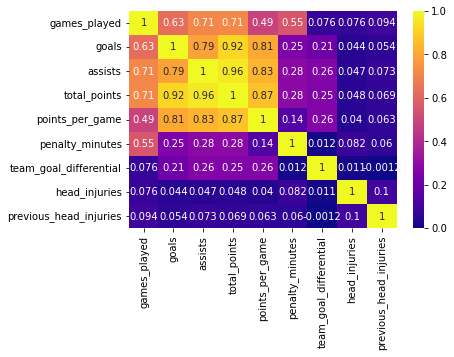

In [21]:
# heatmap of dataframe

# Select only the continuous variables from the DataFrame
df_continuous = df.select_dtypes(include=[np.number])

# create a correlation matrix from the dataFrame
corr_matrix = df_continuous.corr()

# create a heatmap from the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='plasma' )

# display the heatmap
plt.show()

Nothing is very highly correlated to the target variable (head_injuries).  The column that we created previous_head_injuries has the highest correlation to the target variable, but only has a correlation coefficient of 0.1.  This leads me to believe that there is some randomness in head injuries. 

Dataframe currently has 18,723 rows and 11 columns

In [22]:
df.shape

(18723, 11)

In [23]:
# view dataframe
df.head()

,team,games_played,goals,assists,total_points,points_per_game,penalty_minutes,team_goal_differential,position,head_injuries,previous_head_injuries
0,Pittsburgh Penguins,81,52,69,121,1.49,42.0,19.0,Wing,0,0
1,Colorado Avalanche,82,54,64,118,1.44,30.0,45.0,Wing,0,0
2,New Jersey Devils,82,40,56,96,1.17,51.0,45.0,Wing,0,0
3,Pittsburgh Penguins,79,44,51,95,1.20,96.0,12.0,Wing,0,0
4,Boston Bruins,82,36,59,95,1.16,85.0,-8.0,Wing,0,0


The columns, `team` and `position` still have the object datatype and need to be dummied.

In [24]:
# view datatypes
df.dtypes

team                       object
games_played                int64
goals                       int64
assists                     int64
total_points                int64
points_per_game           float64
penalty_minutes           float64
team_goal_differential    float64
position                   object
head_injuries               int64
previous_head_injuries      int64
dtype: object

Bar plot shows the target column, `head_injuries` as an imbalanced class.

In [25]:
df['head_injuries'].value_counts(normalize=True)

0    0.940234
1    0.059766
Name: head_injuries, dtype: float64

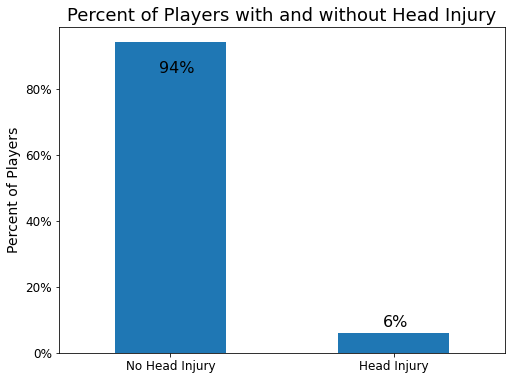

In [26]:
ax = df['head_injuries'].value_counts(normalize=True).mul(100).plot(kind = 'bar', figsize=(8, 6))
plt.xticks([0, 1], ['No Head Injury', 'Head Injury'], rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Percent of Players', fontsize=14)
plt.title('Percent of Players with and without Head Injury', fontsize=18)
plt.text(-0.05, 85, '94%', fontsize=16)
plt.text(.95, 8, '6%', fontsize=16);

### 3. Explore


#### 3.1 VIsualizations 

Defense positions in hockey have a slightly higher number of head injuries demonstrated by the below bar plot.

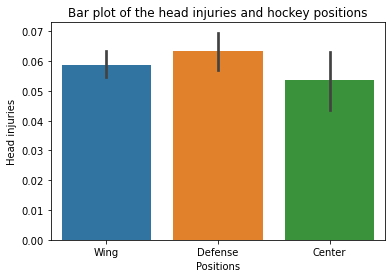

In [27]:
# Plot a bar plot of the head_injuries and a positions columns
sns.barplot(x=df['position'], y=df['head_injuries'])
plt.xlabel('Positions')
plt.ylabel('Head injuries')
plt.title('Bar plot of the head injuries and hockey positions')
plt.show()


Buffalo Sabres, Edmonton Oilers, and Colorado Avalanche are at the top of this bar plot with the most number of head injuries. 

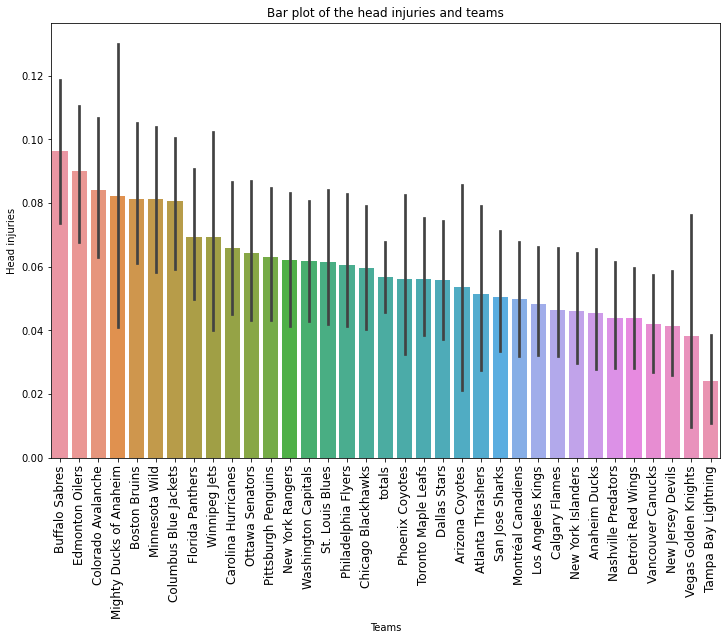

In [28]:
# Plot a bar plot of the head_injuries and the team column
fig = plt.figure(figsize=(12, 8))
# Define the order of the categories
order = df.groupby('team')['head_injuries'].mean().sort_values(ascending=False).index
sns.barplot(x=df['team'], y=df['head_injuries'], order=order)
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('Teams')
plt.ylabel('Head injuries')
plt.title('Bar plot of the head injuries and teams')
plt.show()

#### 3.2 Make Dummy Columns

Make dummy columns for my categorical features.  This is needed for the machine learning that I will be doing in the next section

In [29]:
# dummy categorical columns
# Get list of all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Dummy all categorical columns
for column in categorical_columns:
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)

In [30]:
# look at the shape of the data 
df.shape

(18723, 47)

### 4. Model

#### 4.1 Modeling on next year 
Predicting whether someone gets a head injury in the next year based on this year stats 

Make the `X` and `y` variables.  I will be using the `X` variables to predict the `y` variable 

In [31]:
# Separate the features and target variable
X = df.drop('head_injuries', axis=1)
y = df['head_injuries']

#### Model_helper function

The model function performs the following steps: 
1. Performs a train test split on the data - to properly validate the performance 
2. Performs SMOTE (due to the class imbalance of the target variable)
3. Fits on the selected model 
4. Prints out the training accuracy, testing accuracy, training F1 score, and testing F1 score 

This code is running 5 different classification models to compare their f1_score results. The best F1 score here is with the Random Forest Classifier, F1 Score (Training): 0.9796814936847885 and F1 Score (Testing): 0.16923076923076924.

In [32]:
# running 5 models to see which one has the best f1_score
models = [LogisticRegression(), 
          DecisionTreeClassifier(),
          RandomForestClassifier(random_state=86),
          SVC(),
          GradientBoostingClassifier()]

for model in models:
    print(f"Results for {type(model).__name__}")
    model_helper(X, y, model)
    print('----------------'*5)


Results for LogisticRegression


C:\Users\Jeff\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Score: 0.9177460275070103
Testing Score: 0.9279038718291055
F1 Score (Training): 0.05810397553516819
F1 Score (Testing): 0.028776978417266185
--------------------------------------------------------------------------------
Results for DecisionTreeClassifier
Training Score: 0.9975297102416878
Testing Score: 0.8875834445927904
F1 Score (Training): 0.979591836734694
F1 Score (Testing): 0.1596806387225549
--------------------------------------------------------------------------------
Results for RandomForestClassifier
Training Score: 0.9975297102416878
Testing Score: 0.9423230974632844
F1 Score (Training): 0.9796814936847885
F1 Score (Testing): 0.16923076923076924
--------------------------------------------------------------------------------
Results for SVC
Training Score: 0.527840833222059
Testing Score: 0.5238985313751668
F1 Score (Training): 0.15
F1 Score (Testing): 0.13151485630784218
--------------------------------------------------------------------------------
Results f

Now that I found the best model (random forest classifier) using the defaul hyperparameters, I am going to use gridsearch to see if I can further improve the performance of the model.  

Shows that a random forest classifier with these hyperparameters, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100 will produce the best f1_score of F1 Score (Training): 0.804642166344294 and F1 Score (Testing): 0.12658227848101267.


In [33]:
# Since the RandomForestClassifier has the best, albiet low, f1_score, I will apply a grid search
# to find the best hyperparameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 86)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=86)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1,
                  verbose=4)
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding f1 score
print("Best Hyperparameters:", grid_search.best_params_)
rf_optimal = RandomForestClassifier(**grid_search.best_params_, random_state=86)
model_helper(X, y, rf_optimal, feature_importance=True)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Training Score: 0.979770329817065
Testing Score: 0.9447263017356475
F1 Score (Training): 0.804642166344294
F1 Score (Testing): 0.12658227848101267
                        features  importance
0                   games_played    0.082755
5                penalty_minutes    0.079421
6         team_goal_differential    0.067305
44              position_Defense    0.063727
45                 position_Wing    0.062525
4                points_per_game    0.058475
3                   total_points    0.047227
43               position_Center    0.043045
2                        assists    0.041569
1                          goals    0.035654
42                   team_totals    0.031528
7         previous_head_injuries    0.018946
28       team_New York Islanders    0.014370
37      team_Toronto Maple Leafs    0.013460
36   

RandomForestClassifier(min_samples_split=5, random_state=86)

#### 4.1 Predicting on 3 years 

Predicting whether someone gets a concussion in the next 3 years, based on this years stats

I decided to increase how far I was looking to predict because head injuries can be random and maybe they don't get a head injury in the next year but get one in the next 3 years. 

Since I am changing the target variable completly, I am going to have to go through the OSEMN process again

### Obtain:

Load in the data again and create a new column called year that I will be using to filter on.  

In [34]:
# head injury in the next 3 years 
df_3 = pd.read_csv("data/df.csv")
# add column, "year"
df_3['year'] = df_3['season'].map(lambda x: int(x.split('-')[0]))


### Scrub/Explore:

Make a new column, `head_injury_3`, that will be used to bin head_injury data for the next 3 years, rather than just the next year.

In [35]:
df_3['head_injury_3'] = 0

for index, row in df_3.iterrows():
    num_head_inj = df_3[(df_3['player'] == row['player']) & (df_3['year'] > row['year']) & 
      (df_3['year'] <= row['year'] + 5)]['head_injuries'].sum()
    df_3.loc[index, 'head_injury_3'] = num_head_inj

Remove duplicates from dataframe, df_3.

In [36]:
# find and remove duplicates
duplicates = df_3[df_3.duplicated()]
df_3 = df_3.drop_duplicates()

Same as before, converting columns to floats to better run in the models.

In [37]:
# Convert columns with numeric values to floats
columns = ['pim', 'ppg', '+/-']
for column in columns:
    df_3 = df_3[df_3[column] != '-']
    df_3[column] = df_3[column].astype(float)

Rename columns in a standardized, readable format.

In [38]:
# Rename columns
df_3.rename(columns={'gp': 'games_played', 'g': 'goals', 'a': 'assists',
                       'tp': 'total_points', 'ppg': 'points_per_game', 'pim': 'penalty_minutes',
                      '+/-': 'team_goal_differential', 'playername': 'player_name', 'fw_def': 'forward_defense',
                      'Name': 'name', 'Games Missed': 'games_missed'}, inplace=True)

In [39]:
# look at dataframe 
df_3.head()

,player,team,games_played,goals,assists,total_points,points_per_game,penalty_minutes,team_goal_differential,link,season,league,player_name,position,forward_defense,name,games_missed,head_injuries,year,head_injury_3
0,Jaromír Jágr (RW),Pittsburgh Penguins,81,52,69,121,1.49,42.0,19.0,https://www.eliteprospects.com/player/8627/jar...,2000-01,nhl,Jaromír Jágr,RW,FW,0,0.0,0,2000,0
1,Joe Sakic (C),Colorado Avalanche,82,54,64,118,1.44,30.0,45.0,https://www.eliteprospects.com/player/8862/joe...,2000-01,nhl,Joe Sakic,C,FW,0,0.0,0,2000,1
2,Patrik Elias (LW),New Jersey Devils,82,40,56,96,1.17,51.0,45.0,https://www.eliteprospects.com/player/8698/pat...,2000-01,nhl,Patrik Elias,LW,FW,0,0.0,0,2000,0
3,Alexei Kovalev (RW),Pittsburgh Penguins,79,44,51,95,1.20,96.0,12.0,https://www.eliteprospects.com/player/8670/ale...,2000-01,nhl,Alexei Kovalev,RW,FW,0,0.0,0,2000,0
4,Jason Allison (C),Boston Bruins,82,36,59,95,1.16,85.0,-8.0,https://www.eliteprospects.com/player/9064/jas...,2000-01,nhl,Jason Allison,C,FW,0,0.0,0,2000,1


Change values in the position column to be only center, wing, or defense, will dummy later. 

In [40]:
# Condense values in the "position" column to be either center, wing, or defense
mapping = {'RW': 'Wing', 'C': 'Wing', 'LW': 'Wing', 'D': 'Defense', 'LW/RW': 'Wing', 'RW/LW': 'Wing', 'W/C': 'Wing',
           'C/LW': 'Center', 'C/RW': 'Center', 'RW/C': 'Wing', 'LW/C': 'Wing', 'D/RW': 'Defense', 'D/LW': 'Defense',
           'D/C': 'Defense', 'RW/D': 'Wing', 'C/W': 'Center', 'C/D': 'Center', 'F': 'Wing','LW/D': 'Wing',
           'D/W': 'Defense'}
df_3['position'] = df_3['position'].replace(mapping)

The following Python code creates a new binary column in the DataFrame `df_3` based on the values in the `head_injury_3` column.

In [41]:
# Add new column "head_injury_3_bin" and populate it based on the values in "head_injury_3"
df_3['head_injury_3_bin'] = np.where(df_3['head_injury_3'] > 0, 1, 0)


View the difference between the original distribution of the target variable and the new target variable, 'head_injury_3_bin`. The original target variable had 6% percent head injuries, whereas the new target variable has 13% head injuries. 

In [42]:
# Print value counts of "head_injuries" and "head_injury_3_bin"
print(df_3['head_injuries'].value_counts(normalize=True))
print(df_3['head_injury_3_bin'].value_counts(normalize=True))

0    0.940234
1    0.059766
Name: head_injuries, dtype: float64
0    0.866101
1    0.133899
Name: head_injury_3_bin, dtype: float64


Drop columns so that it matches the original dataframe, df.

In [44]:
# drop unnecessary columns
df_3.drop(columns=['player', 'link', 'league', 'player_name',  'name', 'season', 'forward_defense',
                   'games_missed', 'year', 'head_injuries', 'head_injury_3'], 
        axis=1, inplace=True)

In [45]:
# view dataframe
df_3.head()

,team,games_played,goals,assists,total_points,points_per_game,penalty_minutes,team_goal_differential,position,head_injury_3_bin
0,Pittsburgh Penguins,81,52,69,121,1.49,42.0,19.0,Wing,0
1,Colorado Avalanche,82,54,64,118,1.44,30.0,45.0,Wing,1
2,New Jersey Devils,82,40,56,96,1.17,51.0,45.0,Wing,0
3,Pittsburgh Penguins,79,44,51,95,1.20,96.0,12.0,Wing,0
4,Boston Bruins,82,36,59,95,1.16,85.0,-8.0,Wing,1


Datatypes in df_3 still have two object columns.

In [46]:
# check datatypes
df_3.dtypes

team                       object
games_played                int64
goals                       int64
assists                     int64
total_points                int64
points_per_game           float64
penalty_minutes           float64
team_goal_differential    float64
position                   object
head_injury_3_bin           int32
dtype: object

Use get_dummies() to dummify the remaining two object columns. 

In [47]:
# dummy categorical columns
# Get list of all categorical columns
categorical_columns = df_3.select_dtypes(include=['object']).columns

# Dummy all categorical columns
for column in categorical_columns:
    dummies = pd.get_dummies(df_3[column], prefix=column)
    df_3 = pd.concat([df_3, dummies], axis=1)
    df_3.drop(column, axis=1, inplace=True)

In [48]:
# view dataframe
df_3.head()

,games_played,goals,assists,total_points,points_per_game,penalty_minutes,team_goal_differential,head_injury_3_bin,team_Anaheim Ducks,team_Arizona Coyotes,...,team_Tampa Bay Lightning,team_Toronto Maple Leafs,team_Vancouver Canucks,team_Vegas Golden Knights,team_Washington Capitals,team_Winnipeg Jets,team_totals,position_Center,position_Defense,position_Wing
0,81,52,69,121,1.49,42.0,19.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,82,54,64,118,1.44,30.0,45.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,82,40,56,96,1.17,51.0,45.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,79,44,51,95,1.20,96.0,12.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,82,36,59,95,1.16,85.0,-8.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


Create the X and y variables for modeling using `head_injury_3_bin` as the target variable. 

In [49]:
# Separate the features and target variable
X = df_3.drop('head_injury_3_bin', axis=1)
y = df_3['head_injury_3_bin']

A random forest classifier is instantiated with RandomForestClassifier(random_state=86). This classifier is passed, along with the predictor variables X, target variable y, and a boolean flag feature_importance=True, to the model_helper() function.

The F1 score is provided for both the training and testing data. The F1 score is a measure of the classifier's accuracy that takes into account both precision and recall. The model that provided the best F1 score is 0.24079320113314448.

The output shows the importance of each feature in the classifier's prediction.The features show the most important feature (penalty_minutes) listed first and the least important feature (team_Mighty Ducks of Anaheim) listed last.

We now get a higher F1 score using this target variable

In [50]:
rf_3 = RandomForestClassifier(random_state=86)

model_helper(X, y, rf_3, feature_importance=True)

Training Score: 0.995660301775938
Testing Score: 0.8582109479305741
F1 Score (Training): 0.9836642372455391
F1 Score (Testing): 0.24680851063829784
                        features  importance
5                penalty_minutes    0.105603
6         team_goal_differential    0.090053
0                   games_played    0.089174
4                points_per_game    0.079747
3                   total_points    0.062507
2                        assists    0.055208
1                          goals    0.049594
43              position_Defense    0.047506
44                 position_Wing    0.039128
42               position_Center    0.038264
41                   team_totals    0.030187
25      team_Nashville Predators    0.012437
26        team_New Jersey Devils    0.011659
21        team_Los Angeles Kings    0.011450
35      team_Tampa Bay Lightning    0.011019
18        team_Detroit Red Wings    0.010830
24       team_Montréal Canadiens    0.010746
30      team_Philadelphia Flyers    0.0106

RandomForestClassifier(random_state=86)

A dummy classifier is shown here to illustrate that using a baseline model, the F1 score is 0. It passes the model to the function model_helper() along with other arguments (X, y, and feature_importance).

In [51]:
dummy = DummyClassifier(random_state=86)

model_helper(X, y, dummy,
             feature_importance=False)

Training Score: 0.8665375884630792
Testing Score: 0.8643524699599466
F1 Score (Training): 0.0
F1 Score (Testing): 0.0


DummyClassifier(random_state=86)

We see our model gets a much higher F1 score and accuracy then the Dummy Classifier, this gives me more confidence in my model

### 5. Interpret
#### 5.1 Confusion Matrix and Classification Report

Accuracy: 0.8852809228797266


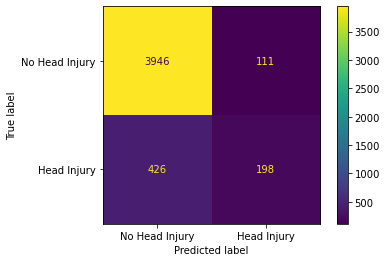

In [52]:
# Interpret the results
# Make predictions on the testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=86)
y_pred = rf_3.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix to evaluate the model's performance
cm = confusion_matrix(y_test, y_pred)
#print("Confusion matrix:\n", cm)
disp = ConfusionMatrixDisplay(cm, display_labels=['No Head Injury', 'Head Injury'])
disp.plot()
plt.show()

- 3,946 instances where the player did not have a head injury and the model predicted them not to have a head injury (true negative)
- 198 instances where the player had a head injury and the model predicted them to have a head injury (true positive)
- 426 instances where the player did have a head injury and the model predicted them not to have a head injury (false negative).  These instances could be due to the randomness of concussions, the way they play does not lead to concussions but they still got one 
- 111 instances where the player did not have a head injury and the model predicted them to have a head injury (false positive).  These instances are players that while they have not had a head injury, the way they play leads them to have a higher probability of a head injury

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      4057
           1       0.64      0.32      0.42       624

    accuracy                           0.89      4681
   macro avg       0.77      0.64      0.68      4681
weighted avg       0.87      0.89      0.87      4681



We see the model does a better job predicting on the majority class (no head injury) then the minority class (head injury), which is to be expected.

#### 5.2 Look at most important features

Most important feature was penalty minutes 

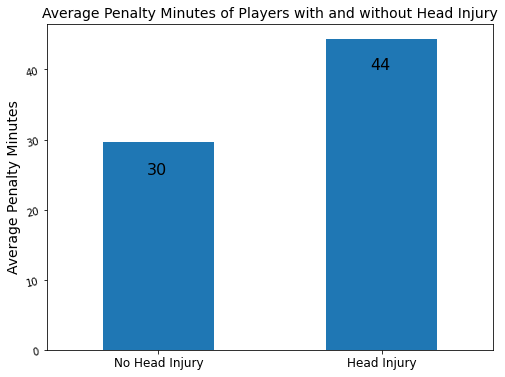

In [54]:
# penalty minutes lead to more head injuries 
X['y'] = y
X.groupby('y')['penalty_minutes'].mean().plot(kind = 'bar', figsize=(8,6))
plt.xticks([0, 1], ['No Head Injury', 'Head Injury'], rotation=0, fontsize=12)
plt.ylabel("Average Penalty Minutes", fontsize=14)
plt.yticks(rotation=12)
plt.xlabel('')
plt.text(-0.05, 25, '30', fontsize=16)
plt.text(0.95, 40, '44', fontsize=16)
plt.title('Average Penalty Minutes of Players with and without Head Injury', fontsize=14);

We see players that get head injuries on average, get more penalty minutes. 

Action: Try to encourage players to not get penalties - as this hurts the team and has damaging effects on the player

**2nd Most important Feature Team Goal Differential**

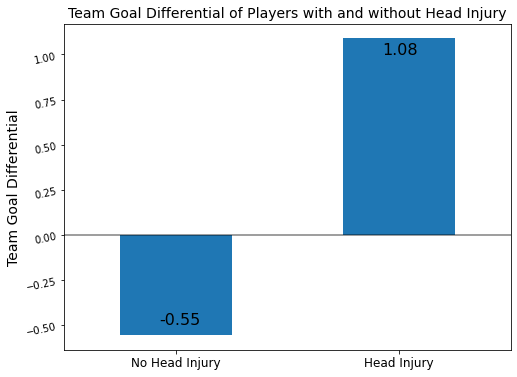

In [55]:
# being on the ice for more goals leads to more head injuries 
X.groupby('y')['team_goal_differential'].mean().plot(kind = 'bar', figsize=(8,6))
plt.xticks([0, 1], ['No Head Injury', 'Head Injury'], rotation=0, fontsize=12)
plt.ylabel("Team Goal Differential", fontsize=14)
plt.yticks(rotation=12)
plt.xlabel('')
plt.axhline(0, color='k', alpha=0.5)
plt.text(-0.075, -0.5, '-0.55', fontsize=16)
plt.text(0.925, 1.00, '1.08', fontsize=16)
plt.title('Team Goal Differential of Players with and without Head Injury', fontsize=14);

No direct insight, just an interesting finding.  Perhaps - players that are trying for goals, also take violent head shots

#### 5.3 Predict Players With Greatest Risk of Head Injury this Year

Using the model I just trained, now I will look at which players have the greatest risk of getting a concussion this year.  We could then pass this list along, so that these players can be properly monitored (head injuries have long lasting effects on health) and to try to prevent a head injury from happening in the first place. 

Perform same data cleaning as was done on the original data that the random forest was trained on 

In [56]:
# head injury in the next 3 years 
df = pd.read_csv("data/df.csv")
# add column, "year"
df_20 = df[df['season'] == '2020-21'].copy()

df_20.drop_duplicates(subset=['player'], inplace=True)

# Convert columns with numeric values to floats
columns = ['pim', 'ppg', '+/-']
for column in columns:
    df_20 = df_20[df_20[column] != '-']
    df_20[column] = df_20[column].astype(float)
    
# Rename columns
df_20.rename(columns={'gp': 'games_played', 'g': 'goals', 'a': 'assists',
                       'tp': 'total_points', 'ppg': 'points_per_game', 'pim': 'penalty_minutes',
                      '+/-': 'team_goal_differential', 'playername': 'player_name', 'fw_def': 'forward_defense',
                      'Name': 'name', 'Games Missed': 'games_missed'}, inplace=True)

# Condense values in the "position" column to be either center, wing, or defense
mapping = {'RW': 'Wing', 'C': 'Wing', 'LW': 'Wing', 'D': 'Defense', 'LW/RW': 'Wing', 'RW/LW': 'Wing', 'W/C': 'Wing',
           'C/LW': 'Center', 'C/RW': 'Center', 'RW/C': 'Wing', 'LW/C': 'Wing', 'D/RW': 'Defense', 'D/LW': 'Defense',
           'D/C': 'Defense', 'RW/D': 'Wing', 'C/W': 'Center', 'C/D': 'Center', 'F': 'Wing','LW/D': 'Wing',
           'D/W': 'Defense'}
df_20['position'] = df_20['position'].replace(mapping)

df_20.set_index('player', inplace=True)
df_20.drop(columns=['link', 'league', 'player_name',  'name', 'season', 'forward_defense',
                   'games_missed', 'head_injuries'], 
        axis=1, inplace=True)

categorical_columns = df_20.select_dtypes(include=['object']).columns

# Dummy all categorical columns
for column in categorical_columns:
    dummies = pd.get_dummies(df_20[column], prefix=column)
    df_20 = pd.concat([df_20, dummies], axis=1)
    df_20.drop(column, axis=1, inplace=True)
df_20['team_Atlanta Thrashers'] = 0
df_20['team_Mighty Ducks of Anaheim'] = 0
df_20['team_Phoenix Coyotes'] = 0

In [57]:
# calculate probability of head injury for current nhl players 
df_20['probability_of_head_injury'] = rf_3.predict_proba(df_20)[:, 1]

C:\Users\Jeff\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [58]:
# find top 10 current nhl players with highest probability of head injury 
df_20.sort_values('probability_of_head_injury', ascending=False)['probability_of_head_injury'].head(10)

player
Brandon Montour (D)        0.91
Jeff Petry (D)             0.89
Cam Fowler (D)             0.89
Shea Weber (D)             0.87
Erik Gudbranson (D)        0.87
Steven Santini (D)         0.87
Shayne Gostisbehere (D)    0.87
Brett Kulak (D)            0.86
Erik Gustafsson (D)        0.86
Steven Kampfer (D)         0.86
Name: probability_of_head_injury, dtype: float64

### Conclusion

Above are the 10 players that are most likely to get a head injury this year.  We should pass this list to NHL teams so they can monitor the players for signs of a head injury and to try to get them to avoid a concussion. 

### Recommendations

### 1. 
Penalty Minutes: Players that have more penalty minutes get more head injuries. 
Actionable Step: NHL coaches and managers make a greater consequence for players who are given penalties.

![Penalty Minutes](https://raw.githubusercontent.com/Marissa841/phase_5_project/main/img/penalty_minutes.png)

### 2. 
Current NHL Players: Players that have a high probability of head injury.
Actionable Step: NHL coaches and managers can have team personnel monitoring for a head injury.

| Player              | Probability of Head Injury |
|---------------------|----------------------------|
| Brandon Montour     | 91%                        |
| Jeff Petry          | 89%                        |
| Cam Fowler          | 89%                        |
| Shea Weber          | 87%                        |
| Erik Gudbranson     | 87%                        |
| Steven Santini      | 87%                        |
| Shayne Gostisbehere | 87%                        |
| Brett Kulak         | 86%                        |
| Erik Gustafsson     | 86%                        |
| Steven Kampfer      | 86&                        |